# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Trivial game described in the Homework and for which you wrote a Markov chain model:

<img src="trivial.png" width="400px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* At each intersection, the player continues along any of the possible intersecting paths with equal probability. 

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [27]:
import numpy as np
!pip install tabulate
from tabulate import tabulate
# All the code will be based on the model presented in the homework report
# List of all the states
"""
States correspondence with Trivial Pursuit board
1 - Pink with pie piece
2 - Green in outer rim
3 - Blue with pie piece
4 - Pink in outer rim
5 - Green with pie piece
6 - Blue in outer rim
7 - Blue in inner rim
8 - Green in inner rim
9 - Pink in inner rim
10 - Center
"""
states = list(range(1,11))
print("List of all the states: ")
print(states)
# Transition probability matrix for dice = 1
md1 = np.array([
	[0,1/3,0,0,0,1/3,1/3,0,0,0],
	[1/2,0,1/2,0,0,0,0,0,0,0],
	[0,1/3,0,1/3,0,0,0,1/3,0,0],
	[0,0,1/2,0,1/2,0,0,0,0,0],
	[0,0,0,1/3,0,1/3,0,0,1/3,0],
	[1/2,0,0,0,1/2,0,0,0,0,0],
	[1/2,0,0,0,0,0,0,0,0,1/2],
	[0,0,1/2,0,0,0,0,0,0,1/2],
	[0,0,0,0,1/2,0,0,0,0,1/2],
	[0,0,0,0,0,0,1/3,1/3,1/3,0]
])

# Use matrix power to obtain remaining dice cases based on dice = 1
md2 = np.linalg.matrix_power(md1,2)
md3 = np.linalg.matrix_power(md1,3)
md4 = np.linalg.matrix_power(md1,4)
md5 = np.linalg.matrix_power(md1,5)
md6 = np.linalg.matrix_power(md1,6)

# Average all the matrixes to obtain the TPM for the whole model
mdt = (md1+md2+md3+md4+md5+md6)/6
print("Transition probability matrix")
print(tabulate(mdt))

List of all the states: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Transition probability matrix
---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
0.185185   0.123457   0.104938   0.0432099  0.104938   0.123457   0.123457   0.0432099  0.0432099  0.104938
0.185185   0.123457   0.185185   0.0833333  0.0648148  0.0833333  0.0833333  0.0833333  0.0432099  0.0648148
0.104938   0.123457   0.185185   0.123457   0.104938   0.0432099  0.0432099  0.123457   0.0432099  0.104938
0.0648148  0.0833333  0.185185   0.123457   0.185185   0.0833333  0.0432099  0.0833333  0.0833333  0.0648148
0.104938   0.0432099  0.104938   0.123457   0.185185   0.123457   0.0432099  0.0432099  0.123457   0.104938
0.185185   0.0833333  0.0648148  0.0833333  0.185185   0.123457   0.0833333  0.0432099  0.0833333  0.0648148
0.185185   0.0833333  0.0648148  0.0432099  0.0648148  0.0833333  0.123457   0.0833333  0.0833333  0.185185
0.0648148  0.0833333  0.185185   0.0833333  0

---

#### Activity 2.

Compute the probability of the following trajectories:

* "Pink with pie piece" - "Green in outer rim" - "Blue with pie slice" - "Pink in outer rim"
* "Pink with pie piece" - "Pink with pie piece" - "Blue in outer rim"
* "Center" - "Pink with pie piece" - "Blue in outer rim"

**Note:** Make sure to print the result in the end.

---

In [28]:
def get_prob(initial_state, next_state):
    return mdt[initial_state-1][next_state-1]

# 1. "Pink with pie piece" - "Green in outer rim" - "Blue with pie slice" - "Pink in outer rim"
print("Probability of PP->GO->BP->PO: %.4f" % (get_prob(1,2)*get_prob(2,3)*get_prob(3,4)))

# 2. "Pink with pie piece" - "Pink with pie piece" - "Blue in outer rim"
print("Probability of PP->PP->BO: %.4f" % (get_prob(1,1)*get_prob(1,6)))

# 3. "Center" - "Pink with pie piece" - "Blue in outer rim"
print("Probability of C->PP->BO: %.4f" % (get_prob(10,1)*get_prob(1,6)))

Probability of PP->GO->BP->PO: 0.0028
Probability of PP->PP->BO: 0.0229
Probability of C->PP->BO: 0.0130


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

Irreducible?
- By definition, a chain is irreducible if any state y can be reached from any other state x.
- Since all the values in the transition probability matrix are positive, then for any states x and y, P(y|x) > 0 for any t.
- So, the chain is irreducible.

Aperiodic?
- By definition, the period of a state x is the greatest common divider of all time steps in which x can be visited if the chain departs from x.
- Since all the values in the transition probability matrix are positive, then the period of all states is equal to 1.
- This means that all states are aperiodic, which means the chain is aperiodic.

Ergodic?
- By definition, an ergodic chain is an irreducible and aperiodic Markov chain and because of being irreducible and aperiodic it possesses a stationary distribution.
- This means our model is an ergodic chain.

---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [29]:
print("Stationary Distribution")
x = np.linalg.eig(np.transpose(mdt))[1][:,0]
norm = x / np.sum(x)
print(norm)

Stationary Distribution
[0.125      0.08333333 0.125      0.08333333 0.125      0.08333333
 0.08333333 0.08333333 0.08333333 0.125     ]


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [30]:
# Insert your code here
# get a 10,000 states sample based on the stationary distribution
sample = np.random.choice(states, size=10000, p=norm)
print("10K states sample")
print(sample)

10K states sample
[ 2  2  5 ...  2 10 10]


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #4.

**Note**: Don't forget to load `matplotlib`.

---

<IPython.core.display.Javascript object>


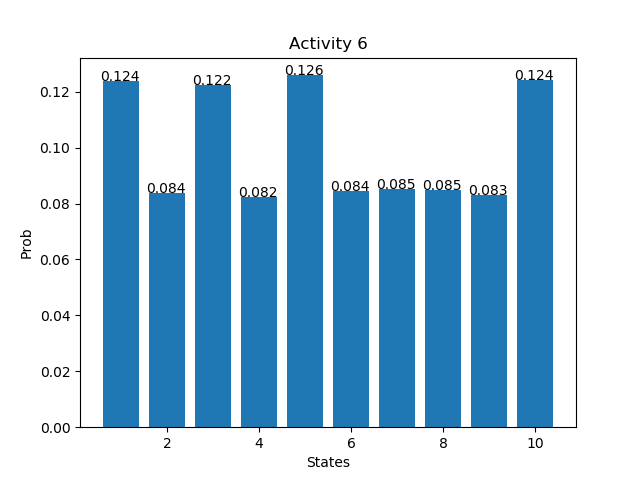

In [31]:
# Insert your code here
%matplotlib notebook
import matplotlib.pyplot as plt

hist, bins = np.histogram(sample, bins=list(range(1,12)), normed=True)
plt.bar(states,hist)

for a,b in zip(bins[:-1], hist):
    plt.text(a-.45, b, str(round(b,3)))
plt.xlabel('States')
plt.ylabel('Prob')
plt.title('Activity 6')
plt.show()

The histogram follows a distribuition like the one we obtained in Activity 4, the stationary distribution for the chain. 
The probability of being in state 1/3/5/10 is more or less 0.120/0.125 and the probability of being in the remaining states is 0.080/0.085.
